<a href="https://colab.research.google.com/github/rekhachakkara/python_projects/blob/master/powerlifting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [3]:
def pretty_print(df, n):
  print(tabulate(df.head(n),headers='keys',tablefmt='psql'))

In [4]:
from os import lockf
import pandas as pd
from tabulate import tabulate # tabulate helps to convert the data into tabular form with heares and format eype
data_excel = pd.read_csv("/content/drive/MyDrive/Data_set_rekha/openpowerlifting.csv")
#print("reading from excel all datas",data_excel.to_string)
#data_excel.head()
#data_excel.tail()
#table_format = tabulate(data_excel.head(),headers="keys",tablefmt="html")
table_format = tabulate(data_excel.head(),headers="keys",tablefmt="pSql")
#print("table",table_format)
#to_frame - convert the SerieS object into dataframe
#reSet_index - allowS the index to be reSeted to 0,1,2 etc
#.Size - count the occurence of the groupby
#Syntax: DataFrame.groupby(by=None, axis=0, level=None, as_index=True, sort=True, group_keys=True, squeeze=False, **kwargs)
groupby_male = data_excel.loc[data_excel['Sex'] == "M"].groupby(['State']).size().to_frame('count').reset_index()
Sorted_male = groupby_male.sort_values(by=['count'],ascending=True)
#groupby.mean() #mean remove empty cellS
pretty_print(Sorted_male,10)
groupby_fem = data_excel.loc[data_excel['Sex'] == "F"].groupby(['State']).size().to_frame('count').reset_index()
Sorted_fem = groupby_fem.sort_values(by=['count'],ascending=False)
#groupby.mean() #mean remove empty cellS
pretty_print(Sorted_fem,10)






<ipython-input-4-3380c2dc6887>:4: DtypeWarning: Columns (33,35,38) have mixed types. Specify dtype option on import or set low_memory=False.
  data_excel = pd.read_csv("/content/drive/MyDrive/Data_set_rekha/openpowerlifting.csv")


+----+---------+---------+
|    | State   |   count |
|----+---------+---------|
| 75 | MP      |       1 |
| 32 | ER      |       1 |
| 44 | HEN     |       1 |
| 49 | HUN     |       1 |
| 56 | JL      |       1 |
| 22 | CM      |       1 |
| 58 | JX      |       1 |
| 64 | LN      |       1 |
| 18 | CAN     |       1 |
| 33 | ES      |       1 |
+----+---------+---------+
+-----+---------+---------+
|     | State   |   count |
|-----+---------+---------|
|  15 | CA      |   19802 |
| 115 | TX      |   16280 |
|  30 | FL      |    7734 |
| 124 | WI      |    6230 |
|  69 | NC      |    6123 |
|  83 | NY      |    6086 |
| 121 | WA      |    5970 |
| 117 | VA      |    5921 |
|  88 | PA      |    5707 |
|  84 | OH      |    5705 |
+-----+---------+---------+


<ipython-input-15-cae9fe6a1d75>:7: DtypeWarning: Columns (33,35,38) have mixed types. Specify dtype option on import or set low_memory=False.
  data_excel_top = pd.read_csv("/content/drive/MyDrive/Data_set_rekha/openpowerlifting.csv")


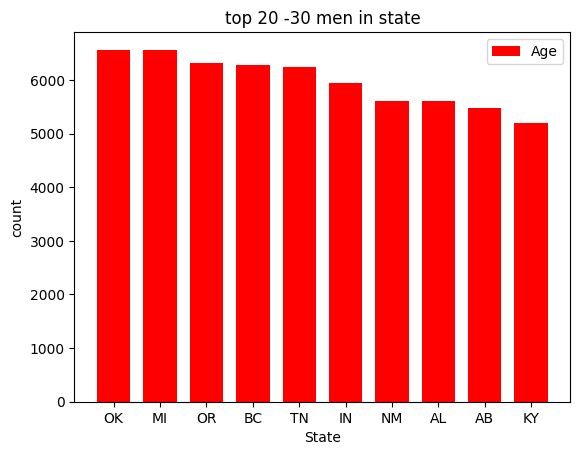

In [15]:
#Plot pie chart and bar chart for Men Top 20-30 states. Matplotlib and Seaborn
from os import lockf
import pandas as pd
import html
import matplotlib.pyplot as plt
from tabulate import tabulate # tabulate helps to convert the data into tabular form with heares and format eype
data_excel_top = pd.read_csv("/content/drive/MyDrive/Data_set_rekha/openpowerlifting.csv")
df_usa_men = data_excel_top[(data_excel_top["Sex"] == "M") & (data_excel_top["Country"] == "USA")]
df_state = data_excel_top.loc[data_excel_top['Sex'] == "M"].groupby(['State']).size().to_frame('count').reset_index()
df_usa_men_sorted = df_state.sort_values(by='count',ascending=False)
#print(df_usa_men.head())
#print(df_state.head())
#print(df_usa_men_sorted.head())
df_men = df_usa_men_sorted.iloc[20:30]
x = list(df_men["State"])
y = list(df_men["count"])
plt.bar(x, y, color='r', width=0.72, label="Age")
plt.xlabel("State")
plt.ylabel("count")
plt.title("top 20 -30 men in state")
plt.legend()
plt.show
print('\n')



['State', 'count']


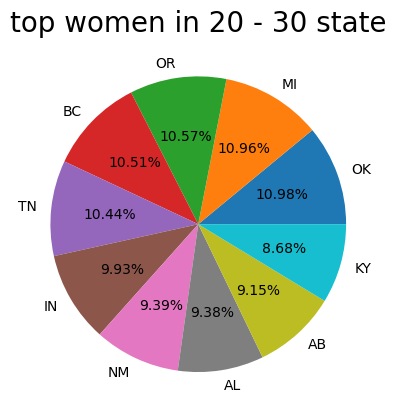

In [16]:
plt.pie(y,labels=x,autopct='%.2f%%')
plt.title("top women in 20 - 30 state", fontsize=20)
plt.show
print(list(df_women))

<ipython-input-13-296ba40dad77>:7: DtypeWarning: Columns (33,35,38) have mixed types. Specify dtype option on import or set low_memory=False.
  data_excel_top_w = pd.read_csv("/content/drive/MyDrive/Data_set_rekha/openpowerlifting.csv")


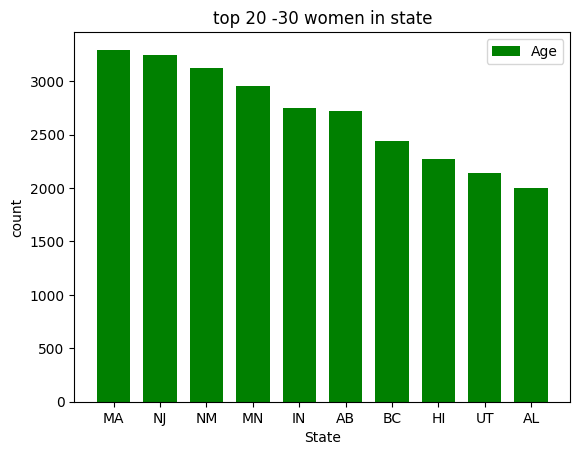

In [13]:
#Plot pie chart and bar chart for women Top 20-30 states. Matplotlib and Seaborn
from os import lockf
import pandas as pd
import html
import matplotlib.pyplot as plt
from tabulate import tabulate # tabulate helps to convert the data into tabular form with heares and format eype
data_excel_top_w = pd.read_csv("/content/drive/MyDrive/Data_set_rekha/openpowerlifting.csv")
df_usa_women = data_excel_top_w[(data_excel_top_w["Sex"] == "F") & (data_excel_top_w["Country"] == "USA")]
df_state_w = data_excel_top_w.loc[data_excel_top_w['Sex'] == "F"].groupby(['State']).size().to_frame('count').reset_index()
df_usa_women_sorted = df_state_w.sort_values(by='count',ascending=False)
#print(df_usa_men.head())
#print(df_state.head())
#print(df_usa_men_sorted.head())
df_women = df_usa_women_sorted.iloc[20:30]
x = list(df_women["State"])
y = list(df_women["count"])
plt.bar(x, y, color='g', width=0.72, label="Age")
plt.xlabel("State")
plt.ylabel("count")
plt.title("top 20 -30 women in state")
plt.legend()
plt.show
print('\n')



['State', 'count']


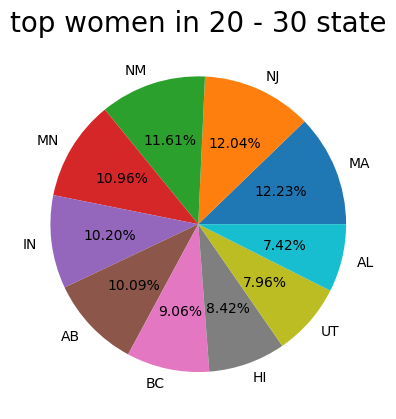

In [14]:
plt.pie(y,labels=x,autopct='%.2f%%')
plt.title("top women in 20 - 30 state", fontsize=20)
plt.show
print(list(df_women))

In [11]:
#For Men, which are top 10 states for year 2021 [For loop of list of years]
import datetime
def get_year(row):
  return datetime.datetime.strptime(row['Date'], '%Y-%m-%d').year

data_excel_top_year = pd.read_csv("/content/drive/MyDrive/Data_set_rekha/openpowerlifting.csv")
df_usa_men_year = data_excel_top_year[(data_excel_top_year["Sex"] == "M") & (data_excel_top_year["Country"] == "USA")]
#print(df_usa_men_year.head())
df_usa_men_year['year'] = df_usa_men_year.apply(get_year,axis = 1)
df_usa_men_2021 = df_usa_men_year[df_usa_men_year['year']  == 2021]
df_state_year = df_usa_men_2021.loc[data_excel_top_year['Sex'] == "M"].groupby(['State']).size().to_frame('count').reset_index()
#print(df_state_year.head())
df_usa_men_sorted_year = df_state_year.sort_values(by='count',ascending=False)
print("top 10 states of men in 2021")
pretty_print(df_usa_men_sorted_year,10)


<ipython-input-11-ba3d26428c46>:6: DtypeWarning: Columns (33,35,38) have mixed types. Specify dtype option on import or set low_memory=False.
  data_excel_top_year = pd.read_csv("/content/drive/MyDrive/Data_set_rekha/openpowerlifting.csv")
<ipython-input-11-ba3d26428c46>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_usa_men_year['year'] = df_usa_men_year.apply(get_year,axis = 1)


top 10 states of men in 2021
+----+---------+---------+
|    | State   |   count |
|----+---------+---------|
|  4 | CA      |    3617 |
| 43 | TX      |    3400 |
|  9 | FL      |    1990 |
| 35 | OH      |    1629 |
| 38 | PA      |    1428 |
| 45 | VA      |    1367 |
| 27 | NC      |    1349 |
| 34 | NY      |    1149 |
| 10 | GA      |    1080 |
| 24 | MO      |    1002 |
+----+---------+---------+


In [17]:
#For women, which are top 10 states for year 2021 [For loop of list of years]
import datetime
def get_year(row):
  return datetime.datetime.strptime(row['Date'], '%Y-%m-%d').year

data_excel_top_year = pd.read_csv("/content/drive/MyDrive/Data_set_rekha/openpowerlifting.csv")
df_usa_women_year = data_excel_top_year[(data_excel_top_year["Sex"] == "F") & (data_excel_top_year["Country"] == "USA")]
print(df_usa_men_year.head())
df_usa_women_year['year'] = df_usa_women_year.apply(get_year,axis = 1)
df_usa_women_2021 = df_usa_women_year[df_usa_women_year['year']  == 2021]
df_state_year_w = df_usa_women_2021.loc[data_excel_top_year['Sex'] == "F"].groupby(['State']).size().to_frame('count').reset_index()
#print(df_state_year.head())
df_usa_women_sorted_year = df_state_year_w.sort_values(by='count',ascending=False)
print("top 10 states of women in 2021")
pretty_print(df_usa_women_sorted_year,10)

<ipython-input-17-aca196b1524c>:6: DtypeWarning: Columns (33,35,38) have mixed types. Specify dtype option on import or set low_memory=False.
  data_excel_top_year = pd.read_csv("/content/drive/MyDrive/Data_set_rekha/openpowerlifting.csv")


                Name Sex Event  Equipment   Age AgeClass BirthYearClass  \
200    Richard Silva   M     D  Multi-ply  40.0    40-44          40-49   
1218  Daniel Ramires   M   SBD      Wraps  27.0    24-34          24-39   
4592  Jesus Martinez   M   SBD      Wraps   NaN      NaN            NaN   
4822      Jose Ramos   M   SBD      Wraps   NaN      NaN            NaN   
4957  João Gonçalves   M   SBD        Raw  24.5    24-34          24-39   

     Division  BodyweightKg WeightClassKg  ...  Country  State    Federation  \
200     MO EQ          76.5          82.5  ...      USA    NaN       CONBRAP   
1218       MO          67.5          67.5  ...      USA    NaN           GPC   
4592     Open          87.5            90  ...      USA    NaN  WPC-Portugal   
4822     Open          88.3            90  ...      USA    NaN  WPC-Portugal   
4957     Open          88.6            90  ...      USA    NaN  WPC-Portugal   

      ParentFederation        Date  MeetCountry  MeetState  MeetTown

<ipython-input-17-aca196b1524c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_usa_women_year['year'] = df_usa_women_year.apply(get_year,axis = 1)


top 10 states of women in 2021
+----+---------+---------+
|    | State   |   count |
|----+---------+---------|
| 43 | TX      |    1770 |
|  4 | CA      |    1759 |
|  9 | FL      |    1006 |
| 35 | OH      |     784 |
| 27 | NC      |     761 |
| 45 | VA      |     645 |
| 38 | PA      |     592 |
| 34 | NY      |     555 |
| 24 | MO      |     500 |
| 48 | WI      |     496 |
+----+---------+---------+


<ipython-input-11-499bfdadf054>:25: DtypeWarning: Columns (33,35,38) have mixed types. Specify dtype option on import or set low_memory=False.
  data_excel_top_year = pd.read_csv("/content/drive/MyDrive/Data_set_rekha/openpowerlifting.csv")
<ipython-input-11-499bfdadf054>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Age"].fillna(0, inplace=True)
<ipython-input-11-499bfdadf054>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age_range'] = df.apply(func_to_age,axis=1)


age count of men   age_range   count
0     18-30  274668
1     31-40   75513
2     41-50   48125
3     51-60   27668
4        na   96529


<ipython-input-11-499bfdadf054>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_women_range["Age"].fillna(0, inplace=True)
<ipython-input-11-499bfdadf054>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_women_range['age_range'] = df_women_range.apply(func_to_age,axis=1)


age count of women   age_range   count
0     18-30  107006
1     31-40   36992
2     41-50   22012
3     51-60    9864
4        na   18467


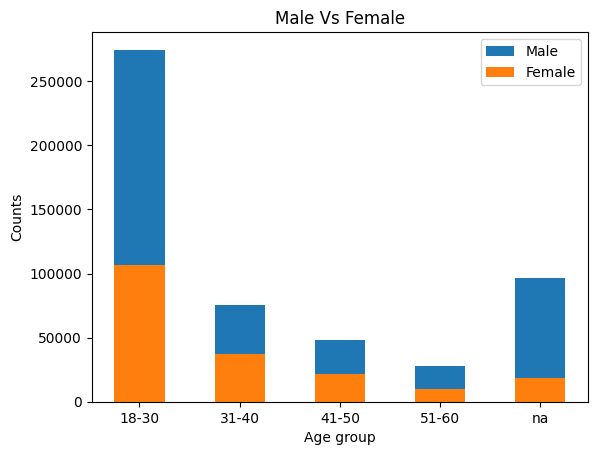

In [11]:
#Stack bar chart for men vs women X axis -> 18-30 | 31-40 | 41-50 | 51-60
import pandas as pd
def fn_age_bucket(age):
  age = str(age)
  if int(age) >= 18 and int(age) <= 30:
    return '18-30'
  elif int(age) >= 31 and int(age) <= 40:
    return '31-40'
  elif int(age) >= 41 and int(age) <= 50:
    return '41-50'
  elif int(age) >= 51 and int(age) <= 60:
    return '51-60'

def func_to_age(row):
  try:
    arr_age = str(row["AgeClass"]).split("-")
    if len(arr_age) >=2:
      max_age_class = int(arr_age[0])
      return fn_age_bucket(max_age_class)
    else:
        return fn_age_bucket(row["Age"])
  except:
      return "na"

data_excel_top_year = pd.read_csv("/content/drive/MyDrive/Data_set_rekha/openpowerlifting.csv")
df = data_excel_top_year[(data_excel_top_year["Sex"] == "M") & (data_excel_top_year["Country"] == "USA")]
df["Age"].fillna(0, inplace=True)
#print(df.head())
df['age_range'] = df.apply(func_to_age,axis=1)
#print(df.head(5))
df_range = df.groupby("age_range").size().to_frame("count").reset_index()
print('age count of men',df_range.head(5))



df_women_range = data_excel_top_year[(data_excel_top_year["Sex"] == "F") & (data_excel_top_year["Country"] == "USA")]
df_women_range["Age"].fillna(0, inplace=True)
#print(df.head())
df_women_range['age_range'] = df_women_range.apply(func_to_age,axis=1)
#print(df.head(5))
df_range_wo = df_women_range.groupby("age_range").size().to_frame("count").reset_index()
print('age count of women',df_range_wo.head(5))

#STACKED BAR-CHART FOR MEN VS WOMEN  [ 18-30, 31-40, 41-50, 51-60 ]
import matplotlib.pyplot as plt
age_range = df_range['age_range'].unique()
male = df_range['count'].unique()
female = df_range_wo['count'].unique()
# define width of stacked chart
w = 0.5
# plot stacked bar chart
plt.bar(age_range, male, w, label='Male')
plt.bar(age_range, female, w, label='Female')
# add labels
plt.xlabel("Age group")
plt.ylabel("Counts")
plt.title("Male Vs Female")
# add legend
plt.legend()
plt.show()

